<a href="https://colab.research.google.com/github/HubertDalm/BehavioralBiometryUniProject/blob/master/behavioral_biometry_isolation_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BEHAVIORAL BIOMETRY USING MOUSE MOVEMENT
## DATASET :https://github.com/balabit/Mouse-Dynamics-Challenge

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

gvkrishnakireeti_balabit_dataset_path = kagglehub.dataset_download('gvkrishnakireeti/balabit-dataset')
hubertd1618_anomaly_labels_path = kagglehub.dataset_download('hubertd1618/anomaly-labels')

print('Data source import complete.')


100%|██████████| 61.1M/61.1M [00:00<00:00, 76.0MB/s]

Extracting files...


100%|██████████| 5.17k/5.17k [00:00<00:00, 1.24MB/s]

Extracting files...
Data source import complete.


In [ ]:
!unzip /content/plik.zip

Archive:  /content/plik.zip
  inflating: Balabit_dataset_refined(Scroll)/Balabit_dataset_refined(Scroll)/GAN.py  
  inflating: Balabit_dataset_refined(Scroll)/Balabit_dataset_refined(Scroll)/fake_data/user12/session_2144641057.csv  
  inflating: Balabit_dataset_refined(Scroll)/Balabit_dataset_refined(Scroll)/fake_data/user12/session_5265929106.csv  
  inflating: Balabit_dataset_refined(Scroll)/Balabit_dataset_refined(Scroll)/fake_data/user12/session_5815391283.csv  
  inflating: Balabit_dataset_refined(Scroll)/Balabit_dataset_refined(Scroll)/fake_data/user12/session_7409188284.csv  
  inflating: Balabit_dataset_refined(Scroll)/Balabit_dataset_refined(Scroll)/fake_data/user12/session_8872593360.csv  
  inflating: Balabit_dataset_refined(Scroll)/Balabit_dataset_refined(Scroll)/fake_data/user12/session_9031593624.csv  
  inflating: Balabit_dataset_refined(Scroll)/Balabit_dataset_refined(Scroll)/fake_data/user12/session_9838420452.csv  
  inflating: Balabit_dataset_refined(Scroll)/Balabit_

In [ ]:
!unzip /content/public_labels.csv

Archive:  /content/public_labels.csv
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/public_labels.csv or
        /content/public_labels.csv.zip, and cannot find /content/public_labels.csv.ZIP, period.


In [ ]:
import numpy as np # linear algebra
import os
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
data =pd.read_csv('/content/Balabit_dataset_refined(Scroll)/Balabit_dataset_refined(Scroll)/training_files/user12/session_2144641057.csv')
data

,record timestamp,client timestamp,button,state,x,y
0,0.000,0.000,NoButton,Move,1043,410
1,0.232,0.094,NoButton,Move,1024,410
2,0.232,0.094,NoButton,Move,1019,410
3,0.232,0.234,NoButton,Move,979,409
4,0.342,0.234,NoButton,Move,974,411
...,...,...,...,...,...,...
29670,15653.662,15653.749,NoButton,Move,1008,493
29671,15653.838,15653.920,NoButton,Move,1005,476
29672,15654.062,15654.014,NoButton,Move,1006,471
29673,15654.062,15654.139,NoButton,Move,1012,466


In [ ]:
data.describe()

,record timestamp,client timestamp,x,y
count,29675.000000,29675.000000,29675.000000,29675.000000
mean,6983.410863,6983.417429,762.772030,508.889806
std,4581.241446,4581.269223,365.133433,230.503992
min,0.000000,0.000000,0.000000,0.000000
25%,2993.997000,2994.010500,483.000000,347.000000
50%,6473.110000,6473.137000,749.000000,494.000000
75%,10496.763500,10496.816000,990.000000,692.000000
max,15654.895000,15654.981000,1919.000000,1079.000000


In [ ]:
public_labels=pd.read_csv('/content/public_labels.csv')
public_labels

,filename,is_illegal
0,session_0003960194,1
1,session_0005840196,0
2,session_0025450757,0
3,session_0029922803,0
4,session_0064281061,1
...,...,...
811,session_9938110038,0
812,session_9951071945,1
813,session_9956793065,0
814,session_9973193301,0


# DLA DANYCH TRENINGOWYCH

In [ ]:
from collections import UserString
# Ścieżka do głównego katalogu z folderami użytkowników
base_dir = "/kaggle/input/balabit-dataset/Balabit_dataset_refined(Scroll)/Balabit_dataset_refined(Scroll)/training_files"
base_dir_collab='/content/Balabit_dataset_refined(Scroll)/Balabit_dataset_refined(Scroll)/training_files'
# Lista wszystkich użytkowników
users = os.listdir(base_dir_collab)
print(users)
# Słownik przechowujący dane dla każdego użytkownika
user_sessions = {}

# Iteracja przez foldery użytkowników
for user in users:
    user_path = os.path.join(base_dir_collab, user)

    if os.path.isdir(user_path):  # Upewnij się, że to folder
        all_sessions = []

        # Iteracja przez pliki sesji w folderze użytkownika
        for file in os.listdir(user_path):
            file_path = os.path.join(user_path, file)

            if file.endswith(".csv"):  # Sprawdź, czy to plik CSV
                # Wczytaj dane sesji
                session_df = pd.read_csv(file_path)

                # Dodaj do listy sesji
                all_sessions.append(session_df)

        # Połącz wszystkie sesje dla danego użytkownika
        if all_sessions:
            user_sessions[user] = pd.concat(all_sessions, ignore_index=True)

['user21', 'user9', 'user12', 'user7', 'user29', 'user23', 'user20', 'user15', 'user16', 'user35']


In [ ]:
df_12=pd.DataFrame(user_sessions['user12'])

user_sessions['user12']

,record timestamp,client timestamp,button,state,x,y
0,0.000,0.000,NoButton,Move,757,565
1,0.248,0.249,NoButton,Move,756,564
2,0.353,0.358,NoButton,Move,769,545
3,0.456,0.468,NoButton,Move,782,511
4,0.567,0.577,NoButton,Move,758,473
...,...,...,...,...,...,...
239493,17995.961,17996.057,NoButton,Move,1126,335
239494,17996.553,17996.650,NoButton,Move,1128,333
239495,17996.713,17996.806,NoButton,Move,1131,331
239496,17996.729,17996.821,Left,Pressed,1131,331


# DLA DANYCH TESTOWYCH

In [ ]:
# Ścieżka do głównego katalogu z folderami użytkowników
base_dir = "/kaggle/input/balabit-dataset/Balabit_dataset_refined(Scroll)/Balabit_dataset_refined(Scroll)/test_files"
base_dir_collab='/content/Balabit_dataset_refined(Scroll)/Balabit_dataset_refined(Scroll)/test_files'
# Lista wszystkich użytkowników
users = os.listdir(base_dir_collab)

# Słownik przechowujący dane dla każdego użytkownika
user_sessions_t = {}

# Iteracja przez foldery użytkowników
for user in users:
    user_path = os.path.join(base_dir_collab, user)

    if os.path.isdir(user_path):  # Upewnij się, że to folder
        all_sessions = []

        # Iteracja przez pliki sesji w folderze użytkownika
        for file in os.listdir(user_path):
            file_path = os.path.join(user_path, file)

            if file.endswith(".csv"):  # Sprawdź, czy to plik CSV
                # Wczytaj dane sesji
                session_df = pd.read_csv(file_path)
                session_df['filename'] = file.split('.')[0]
                # Dodaj do listy sesji
                all_sessions.append(session_df)

        # Połącz wszystkie sesje dla danego użytkownika
        if all_sessions:
            user_sessions_t[user] = pd.concat(all_sessions, ignore_index=True)

In [ ]:
user_sessions_t['user12'].head(10)


,record timestamp,client timestamp,button,state,x,y,filename
0,0.000,0.000,NoButton,Move,25,325,session_9072596713
1,0.593,0.593,NoButton,Move,25,326,session_9072596713
2,0.891,0.889,NoButton,Move,25,327,session_9072596713
3,1.174,1.170,NoButton,Move,25,328,session_9072596713
4,1.951,1.950,NoButton,Move,25,329,session_9072596713
5,2.088,2.090,NoButton,Move,25,331,session_9072596713
6,2.205,2.184,NoButton,Move,25,333,session_9072596713
7,2.342,2.340,NoButton,Move,27,333,session_9072596713
8,2.443,2.449,NoButton,Move,40,329,session_9072596713
9,2.572,2.574,NoButton,Move,48,328,session_9072596713


In [ ]:
df_test = pd.concat(user_sessions_t.values(), ignore_index=True)
df_test

,record timestamp,client timestamp,button,state,x,y,filename
0,0.000,0.000,NoButton,Move,172,218,session_3172695640
1,0.104,0.109,NoButton,Move,233,225,session_3172695640
2,0.224,0.218,NoButton,Move,243,230,session_3172695640
3,0.336,0.328,NoButton,Move,236,240,session_3172695640
4,0.448,0.452,NoButton,Move,233,244,session_3172695640
...,...,...,...,...,...,...,...
2277493,421.690,421.686,NoButton,Move,998,195,session_0750656501
2277494,421.801,421.796,NoButton,Move,1158,47,session_0750656501
2277495,421.920,421.920,NoButton,Move,1192,14,session_0750656501
2277496,422.128,422.014,NoButton,Move,1210,5,session_0750656501


# DLA DANYCH TESTOWYCH , NIE DOTYCZY DATASETU TRENINGOWEGO

In [ ]:
labels=pd.read_csv('/content/public_labels.csv')
merged_data_t={}
for x, value in user_sessions_t.items():
    merged_data_t[x] = user_sessions_t[x].merge(labels, on="filename", how="inner")

In [ ]:
# SLOWNIK DLA KAZDEGO USER Z ETYKIETAMI DANE TESTOWE
merged_data_t['user12']

,record timestamp,client timestamp,button,state,x,y,filename,is_illegal
0,0.000,0.000,NoButton,Move,25,325,session_9072596713,1
1,0.593,0.593,NoButton,Move,25,326,session_9072596713,1
2,0.891,0.889,NoButton,Move,25,327,session_9072596713,1
3,1.174,1.170,NoButton,Move,25,328,session_9072596713,1
4,1.951,1.950,NoButton,Move,25,329,session_9072596713,1
...,...,...,...,...,...,...,...,...
132091,257.146,256.684,NoButton,Move,0,530,session_8689827198,1
132092,257.146,257.152,NoButton,Move,7,589,session_8689827198,1
132093,257.722,257.245,NoButton,Move,187,758,session_8689827198,1
132094,257.938,257.932,NoButton,Move,211,797,session_8689827198,1


In [ ]:
merged_data_t['user12']['is_illegal'].unique()

array([1, 0])

In [ ]:
all_users_features_t = []
for user_id, user_data in merged_data_t.items():  # Iterate over dictionary items
    user_features = extract_features_with_windowing(user_data, window_size=1.0)
    user_features['user_id'] = user_id  # Add user label
    all_users_features_t.append(user_features)

In [ ]:
all_users_features_t[1]

,avg_speed,max_speed,avg_acceleration,state_count_Move,state_count_Pressed,state_count_Released,state_count_Drag,button_count_NoButton,button_count_Left,button_count_Right,...,avg_duration_Drag,drag_distance,drag_avg_speed,idle_time,actions_per_second,avg_x,avg_y,is_illegal,start_time,user_id
0,3.230562e+07,4.581326e+09,-1.145385e-09,1880,18,13,1,1881,31,0,...,0.008000,315.063486,3.938344e+04,0.0,1939.147953,326.902197,327.235356,0,0.0,user9
1,1.787500e+07,2.616012e+09,5.277695e-10,835,39,42,54,889,81,0,...,0.000741,5702.531082,4.404907e+04,0.0,970.970901,299.823711,313.575258,0,1.0,user9
2,3.395631e+07,3.896467e+09,1.077502e+02,688,19,20,5,693,39,0,...,0.001400,575.856154,2.320140e+08,0.0,737.160098,251.422131,312.752732,0,2.0,user9
3,7.795522e+06,2.191008e+09,-4.057512e-10,587,18,17,2,589,35,0,...,0.000000,929.381461,0.000000e+00,0.0,627.135600,313.258013,330.291667,0,3.0,user9
4,8.346641e+06,2.452434e+09,8.760633e+01,719,22,20,9,728,42,0,...,0.005556,4337.241582,1.028786e+05,0.0,776.992986,301.458442,323.416883,0,4.0,user9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1564,0.000000e+00,0.000000e+00,0.000000e+00,1,0,0,0,1,0,0,...,0.000000,0.000000,0.000000e+00,0.0,0.000000,1512.000000,622.000000,1,6695.0,user9
1565,7.088398e+02,2.839294e+03,0.000000e+00,9,0,0,0,9,0,0,...,0.000000,0.000000,0.000000e+00,0.0,12.000000,1790.777778,342.444444,1,6696.0,user9
1566,2.771955e+02,2.730582e+03,2.730582e+02,8,1,1,0,8,2,0,...,0.000000,0.000000,0.000000e+00,0.0,15.673981,1844.000000,21.800000,1,6697.0,user9
1567,9.344808e+02,4.884982e+03,6.203396e+00,11,0,0,0,11,0,0,...,0.000000,0.000000,0.000000e+00,0.0,12.276787,547.909091,388.363636,1,6698.0,user9


# ------------------------------------------------------------

In [ ]:
def extract_features_with_labels(df):
    features = {}

    # Sort by timestamp
    df = df.sort_values(by="record timestamp")

    # Calculate time differences
    df['time_diff'] = df['record timestamp'].diff().fillna(0)

    # Movement-based features
    df['distance'] = np.sqrt((df['x'].diff()**2 + df['y'].diff()**2).fillna(0))
    df['speed'] = (df['distance'] / df['time_diff']).replace([np.inf, -np.inf], 0).fillna(0)
    df['acceleration'] = df['speed'].diff().fillna(0)

    features['avg_speed'] = df['speed'].mean()
    features['max_speed'] = df['speed'].max()
    features['avg_acceleration'] = df['acceleration'].mean()

    # Frequency of each state
    state_counts = df['state'].value_counts()
    for state in ['Move', 'Pressed', 'Released', 'Drag']:
        features[f'state_count_{state}'] = state_counts.get(state, 0)

    # Frequency of each button
    button_counts = df['button'].value_counts()
    for button in ['NoButton', 'Left', 'Right']:
        features[f'button_count_{button}'] = button_counts.get(button, 0)

    # State transition counts
    df['state_transition'] = df['state'].shift() + '->' + df['state']
    transition_counts = df['state_transition'].value_counts()
    for transition in ['Move->Pressed', 'Pressed->Released', 'Drag->Released']:
        features[f'state_transition_{transition}'] = transition_counts.get(transition, 0)

    # Average time spent in each state
    state_durations = df.groupby('state')['time_diff'].mean().to_dict()
    for state in ['Move', 'Pressed', 'Released', 'Drag']:
        features[f'avg_duration_{state}'] = state_durations.get(state, 0)

    # Drag-specific features
    drag_data = df[df['state'] == 'Drag']
    features['drag_distance'] = drag_data['distance'].sum()
    features['drag_avg_speed'] = drag_data['speed'].mean() if not drag_data.empty else 0

    # Overall temporal and spatial features
    features['idle_time'] = df['time_diff'][df['time_diff'] > 1].sum()
    time_range = df['record timestamp'].max() - df['record timestamp'].min()
    features['actions_per_second'] = len(df) / time_range if time_range > 0 else 0
    features['avg_x'] = df['x'].mean()
    features['avg_y'] = df['y'].mean()


    return pd.DataFrame([features])

In [ ]:


def extract_features_with_windowing(df, window_size=1.0):

    # Ensure data is sorted by timestamp
    df = df.sort_values(by="record timestamp")

    # Initialize feature storage
    features_list = []

    # Define start and end times for each window
    start_time = df['record timestamp'].min()
    end_time = df['record timestamp'].max()

    # Slide over time windows
    current_start = start_time
    while current_start < end_time:
        current_end = current_start + window_size

        # Get data within the current window
        window_data = df[(df['record timestamp'] >= current_start) &
                         (df['record timestamp'] < current_end)]

        # Skip empty windows
        if len(window_data) == 0:
            current_start = current_end
            continue

        # Extract features for the current window
        features = extract_features_with_labels(window_data)

        # Handle the 'is_illegal' label (majority rule or proportional threshold)
        if 'is_illegal' in window_data.columns:
            majority_label = window_data['is_illegal'].mode()[0]  # Majority rule
            features['is_illegal'] = majority_label



        features['start_time'] = current_start  # Add window identifier
        features_list.append(features)

        # Move to the next window
        current_start = current_end

    # Combine all features into a single DataFrame
    features_df = pd.concat(features_list, ignore_index=True)
    return features_df

In [ ]:

all_users_features = []
for user_id, user_data in user_sessions.items():  # Iterate over dictionary items
    user_features = extract_features_with_windowing(user_data, window_size=1.0)
    user_features['user_id'] = user_id  # Add user label
    all_users_features.append(user_features)

    # Combine features from all users
features_df = pd.concat(all_users_features, ignore_index=True)

In [ ]:
all_users_features[1].describe()


,avg_speed,max_speed,avg_acceleration,state_count_Move,state_count_Pressed,state_count_Released,state_count_Drag,button_count_NoButton,button_count_Left,button_count_Right,...,avg_duration_Pressed,avg_duration_Released,avg_duration_Drag,drag_distance,drag_avg_speed,idle_time,actions_per_second,avg_x,avg_y,start_time
count,1.033200e+04,1.033200e+04,1.033200e+04,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000,...,10332.000000,10332.000000,10332.000000,10332.000000,1.033200e+04,10332.0,10332.000000,10332.000000,10332.000000,10332.000000
mean,9.600411e+05,1.935184e+07,7.784100e+04,10.184669,0.847077,0.847271,0.555362,10.740031,1.692993,0.001355,...,0.025408,0.036131,0.008129,78.942575,1.772063e+05,0.0,18.099673,336.783741,313.066675,6035.907666
std,1.047800e+07,1.999335e+08,2.614903e+06,7.261263,0.913995,0.907971,1.631214,7.535620,1.759749,0.050148,...,0.056776,0.045709,0.026037,330.188111,8.311166e+06,0.0,58.649296,230.386278,159.518810,3976.638407
min,0.000000e+00,0.000000e+00,-1.907349e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,2.400000,0.000000
25%,1.146665e+02,4.650426e+02,0.000000e+00,5.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,10.695188,189.222222,205.980769,2761.750000
50%,1.338517e+03,7.326369e+03,2.586846e+00,8.000000,1.000000,1.000000,0.000000,9.000000,2.000000,0.000000,...,0.000000,0.009000,0.000000,0.000000,0.000000e+00,0.0,15.021459,276.500000,290.878205,5486.500000
75%,7.034457e+03,4.916690e+04,1.286788e+02,14.000000,1.000000,1.000000,0.000000,15.000000,2.000000,0.000000,...,0.028000,0.071500,0.000000,0.000000,0.000000e+00,0.0,21.582710,421.500000,392.456044,9262.250000
max,2.856833e+08,4.459124e+09,1.349606e+08,70.000000,8.000000,7.000000,17.000000,70.000000,15.000000,2.000000,...,0.898000,0.644000,0.602000,5965.243013,5.664630e+08,0.0,3000.210015,1918.000000,1071.000000,15807.000000


In [ ]:
all_users_features[1].columns

Index(['avg_speed', 'max_speed', 'avg_acceleration', 'state_count_Move',
       'state_count_Pressed', 'state_count_Released', 'state_count_Drag',
       'button_count_NoButton', 'button_count_Left', 'button_count_Right',
       'state_transition_Move->Pressed', 'state_transition_Pressed->Released',
       'state_transition_Drag->Released', 'avg_duration_Move',
       'avg_duration_Pressed', 'avg_duration_Released', 'avg_duration_Drag',
       'drag_distance', 'drag_avg_speed', 'idle_time', 'actions_per_second',
       'avg_x', 'avg_y', 'start_time', 'user_id'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
def norm_feature(all_users_features):
        # Features to normalize
        features_to_normalize = [
            'avg_speed', 'max_speed', 'avg_acceleration',
            'drag_distance', 'drag_avg_speed',
            'actions_per_second', 'avg_x', 'avg_y'
        ]

        # Create a list to store normalized features
        normalized_features = []

        # Iterate through the user feature datasets
        for user_features in all_users_features:
            # Create a copy of the dataset to avoid modifying the original
            user_normalized = user_features.copy()

            # Apply StandardScaler to selected features
            scaler = StandardScaler()
            user_normalized[features_to_normalize] = scaler.fit_transform(user_normalized[features_to_normalize])

            # Append normalized features to the list
            normalized_features.append(user_normalized)

        return normalized_features

In [ ]:
# FOR THE TRAINIG SET
normalized_features=norm_feature(all_users_features)

In [ ]:
#FOR THE TEST SET
normalized_features_t=norm_feature(all_users_features_t)

In [ ]:
normalized_features[1].columns

Index(['avg_speed', 'max_speed', 'avg_acceleration', 'state_count_Move',
       'state_count_Pressed', 'state_count_Released', 'state_count_Drag',
       'button_count_NoButton', 'button_count_Left', 'button_count_Right',
       'state_transition_Move->Pressed', 'state_transition_Pressed->Released',
       'state_transition_Drag->Released', 'avg_duration_Move',
       'avg_duration_Pressed', 'avg_duration_Released', 'avg_duration_Drag',
       'drag_distance', 'drag_avg_speed', 'idle_time', 'actions_per_second',
       'avg_x', 'avg_y', 'start_time', 'user_id'],
      dtype='object')

In [ ]:
normalized_features_t[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   avg_speed                           1378 non-null   float64
 1   max_speed                           1378 non-null   float64
 2   avg_acceleration                    1378 non-null   float64
 3   state_count_Move                    1378 non-null   int64  
 4   state_count_Pressed                 1378 non-null   int64  
 5   state_count_Released                1378 non-null   int64  
 6   state_count_Drag                    1378 non-null   int64  
 7   button_count_NoButton               1378 non-null   int64  
 8   button_count_Left                   1378 non-null   int64  
 9   button_count_Right                  1378 non-null   int64  
 10  state_transition_Move->Pressed      1378 non-null   int64  
 11  state_transition_Pressed->Released  1378 no

In [ ]:
# Combine all user feature DataFrames TRAINING DATA
features_df = pd.concat(normalized_features, ignore_index=True)
features_df=features_df.drop(['start_time'], axis=1)

In [ ]:
features_df.head(10)

,avg_speed,max_speed,avg_acceleration,state_count_Move,state_count_Pressed,state_count_Released,state_count_Drag,button_count_NoButton,button_count_Left,button_count_Right,...,avg_duration_Pressed,avg_duration_Released,avg_duration_Drag,drag_distance,drag_avg_speed,idle_time,actions_per_second,avg_x,avg_y,user_id
0,-0.083733,-0.085289,-0.015246,47,1,1,0,47,2,0,...,0.000000,0.054000,0.0,-0.147872,-0.018833,0.0,0.189862,-0.370011,-0.642806,user23
1,-0.083843,-0.086008,-0.015253,33,3,3,0,33,6,0,...,0.021667,0.039667,0.0,-0.147872,-0.018833,0.0,0.146393,-0.571440,-1.110070,user23
2,-0.083320,-0.085707,-0.015327,24,3,3,0,24,6,0,...,0.016333,0.070000,0.0,-0.147872,-0.018833,0.0,0.083658,-0.631750,-0.817514,user23
3,-0.084546,-0.086080,-0.015134,11,0,0,0,11,0,0,...,0.000000,0.000000,0.0,-0.147872,-0.018833,0.0,-0.038569,-0.541728,-0.777002,user23
4,-0.084823,-0.086134,-0.015329,16,0,0,0,16,0,0,...,0.000000,0.000000,0.0,-0.147872,-0.018833,0.0,-0.009070,-0.108074,-0.740998,user23
5,-0.085195,-0.086294,-0.015316,8,1,1,0,8,2,0,...,0.227000,0.085000,0.0,-0.147872,-0.018833,0.0,0.009041,-0.666592,-0.941392,user23
6,-0.085185,-0.086296,-0.015303,7,0,0,0,7,0,0,...,0.000000,0.000000,0.0,-0.147872,-0.018833,0.0,-0.060594,-0.807266,-1.154357,user23
7,-0.085039,-0.086254,-0.015334,20,0,0,0,20,0,0,...,0.000000,0.000000,0.0,-0.147872,-0.018833,0.0,0.022788,-0.698517,-1.119833,user23
8,-0.083961,-0.085729,-0.012359,14,0,0,0,14,0,0,...,0.000000,0.000000,0.0,-0.147872,-0.018833,0.0,-0.015690,-0.370445,-1.483037,user23
9,-0.085018,-0.086242,-0.015333,8,0,0,0,8,0,0,...,0.000000,0.000000,0.0,-0.147872,-0.018833,0.0,-0.059275,-0.434127,-0.898187,user23


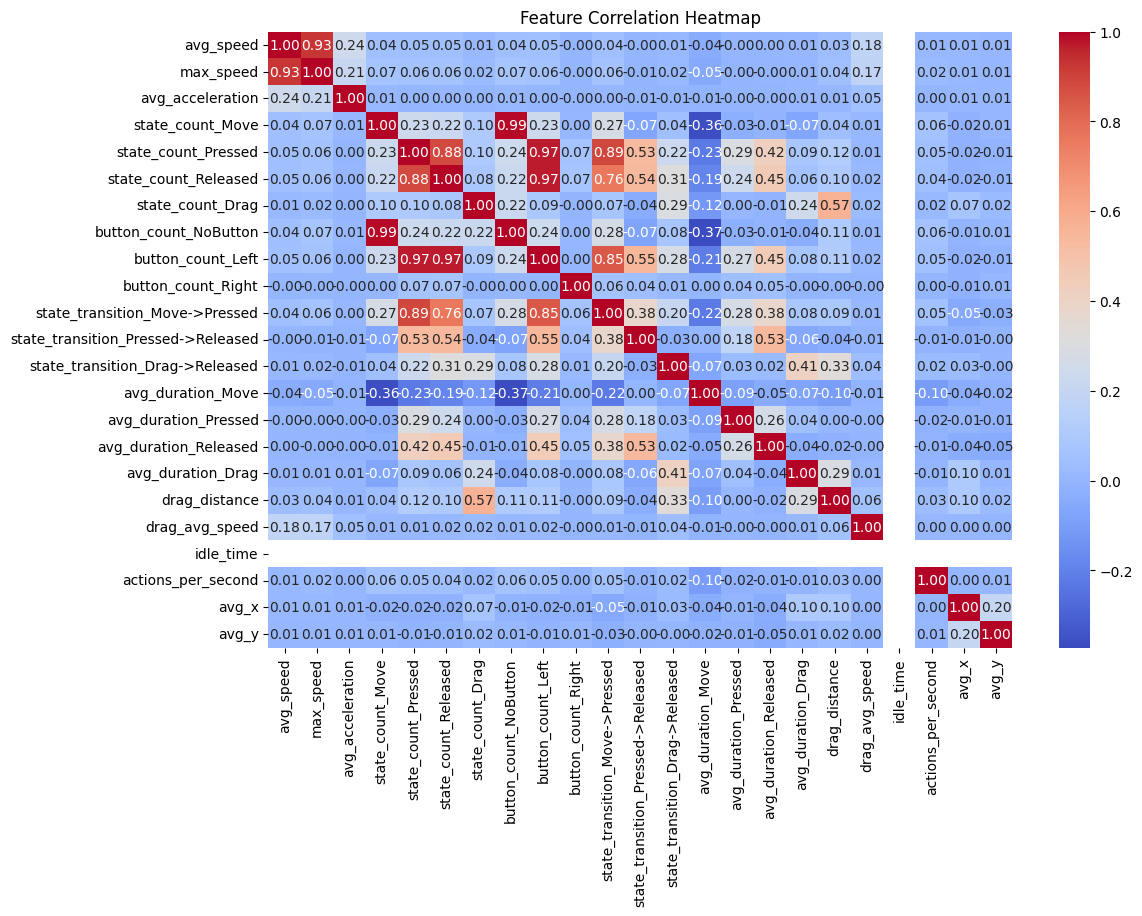

In [ ]:
#FEATURE IMPORTANCE
import matplotlib.pyplot as plt
import seaborn as sns

# corelacja mapy

correlation_matrix=pd.DataFrame(features_df.drop(columns=['user_id'])).corr()


# Plot the heatmap of correlations
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

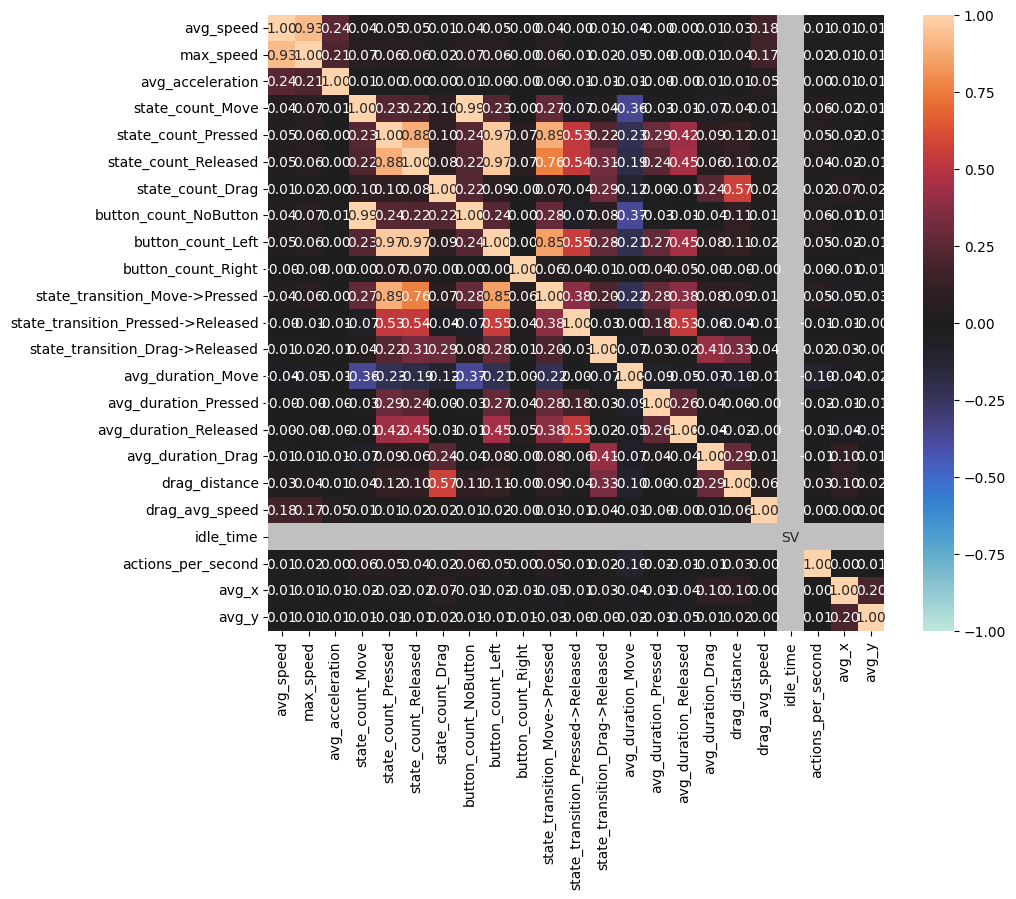

{'corr':                                     avg_speed  max_speed  avg_acceleration  \
 avg_speed                            1.000000   0.926996          0.243893   
 max_speed                            0.926996   1.000000          0.205311   
 avg_acceleration                     0.243893   0.205311          1.000000   
 state_count_Move                     0.043583   0.066483          0.009536   
 state_count_Pressed                  0.045090   0.057769          0.001696   
 state_count_Released                 0.045384   0.057533          0.004180   
 state_count_Drag                     0.014458   0.020949          0.002853   
 button_count_NoButton                0.044488   0.067729          0.009696   
 button_count_Left                    0.046805   0.059571          0.003141   
 button_count_Right                  -0.001136  -0.000307         -0.001542   
 state_transition_Move->Pressed       0.043067   0.059007          0.003811   
 state_transition_Pressed->Released  -0.0013

In [ ]:
!pip install dython
from dython.nominal import associations

associations(features_df.drop(columns=['user_id']), figsize=(10, 8))

In [ ]:
import os

# Create a directory for saving models
os.makedirs('models', exist_ok=True)

In [ ]:
from sklearn.ensemble import IsolationForest
from joblib import dump

# Train an Isolation Forest for each user
user_models = {}
for user_id, user_data in features_df.groupby('user_id'):
    user_features = user_data.drop(columns=['user_id'])
    model = IsolationForest(contamination=0.1, random_state=42)

    model.fit(user_features)
    user_models[user_id] = model






In [ ]:

# Save each user's model to a file
for user_id, model in user_models.items():
    model_path = f"models/user_{user_id}_isolation_forest.joblib"
    dump(model, model_path)

In [ ]:
!zip -r models.zip models

  adding: models/ (stored 0%)
  adding: models/user_user35_isolation_forest.joblib (deflated 74%)
  adding: models/user_user23_isolation_forest.joblib (deflated 74%)
  adding: models/user_user20_isolation_forest.joblib (deflated 74%)
  adding: models/user_user7_isolation_forest.joblib (deflated 74%)
  adding: models/user_user29_isolation_forest.joblib (deflated 74%)
  adding: models/user_user12_isolation_forest.joblib (deflated 74%)
  adding: models/user_user16_isolation_forest.joblib (deflated 74%)
  adding: models/user_user21_isolation_forest.joblib (deflated 74%)
  adding: models/user_user15_isolation_forest.joblib (deflated 74%)
  adding: models/user_user9_isolation_forest.joblib (deflated 74%)


In [ ]:


# Predict for a new user session
y_labels=[]
prediction=[]
anomaly_scores=[]
for  i,user in enumerate(user_models.keys()):
    y_labels.append(normalized_features_t[i]['is_illegal'])
    new_user_data = normalized_features_t[i].drop(['is_illegal','start_time','user_id'], axis=1)

    prediction.append(user_models[user].predict(new_user_data))
    anomaly_scores.append(user_models[user].decision_function(new_user_data))
# Interpret prediction: 1 = normal, -1 = anomaly
print(prediction)
print(anomaly_scores[1])

[array([-1, -1, -1, ...,  1,  1,  1]), array([-1, -1, -1, ...,  1,  1,  1]), array([-1, -1, -1, ...,  1,  1, -1]), array([-1, -1, -1, ...,  1,  1,  1]), array([-1, -1, -1, ...,  1,  1,  1]), array([-1, -1, -1, ...,  1, -1,  1]), array([-1, -1, -1, ...,  1,  1,  1]), array([-1, -1, -1, ...,  1,  1, -1]), array([-1, -1, -1, ..., -1,  1,  1]), array([-1, -1, -1, ...,  1,  1,  1])]
[-0.20840784 -0.27978943 -0.30461737 ...  0.12133575  0.13693905
  0.01968882]


In [ ]:
prediction[i]=[(1 if i == -1  else 0) for i in prediction[i]]

NameError: name 'prediction' is not defined

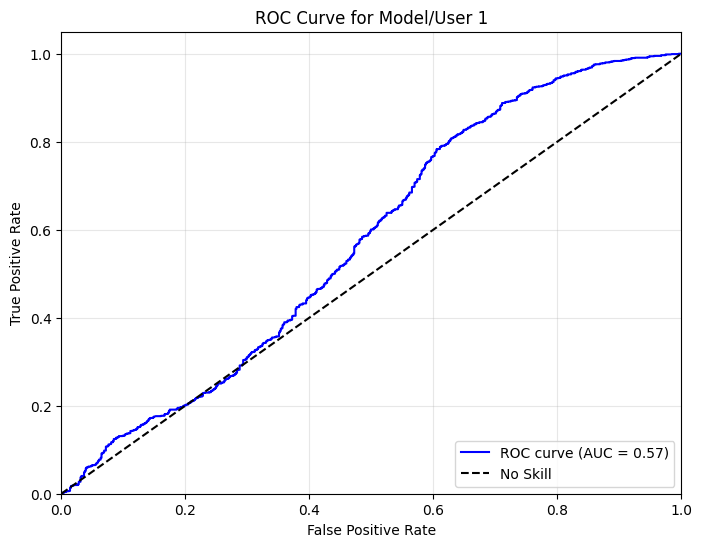

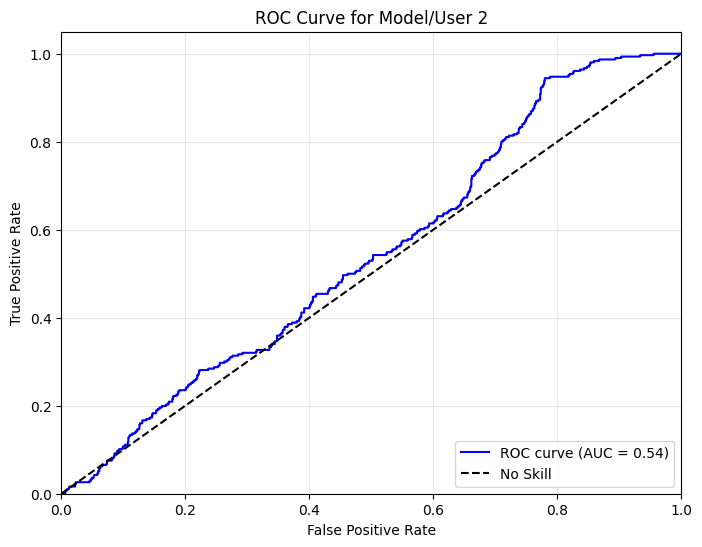

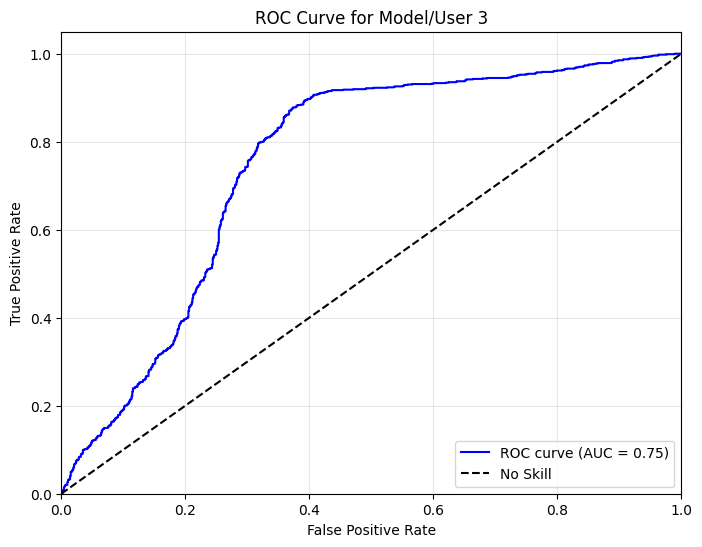

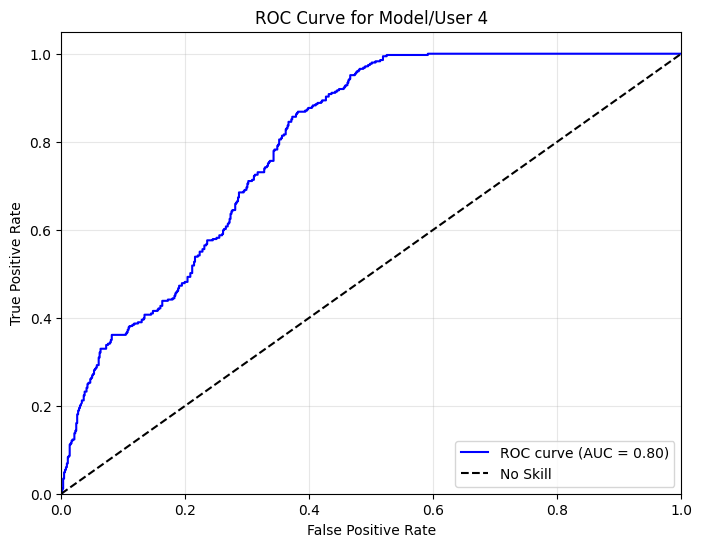

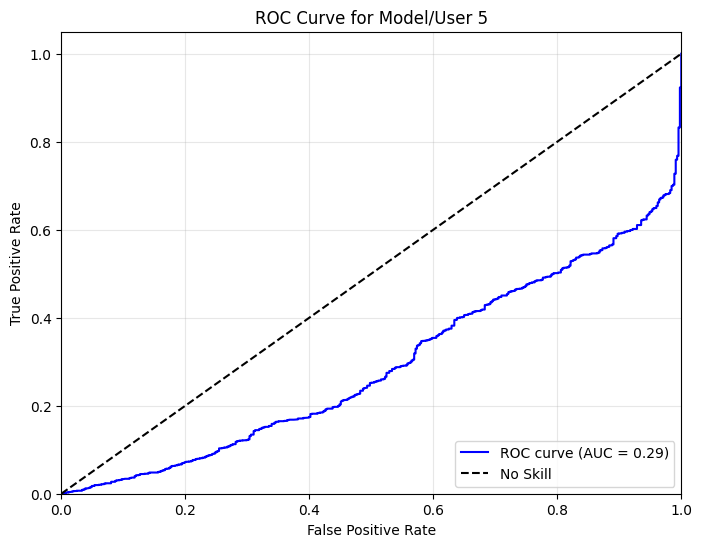

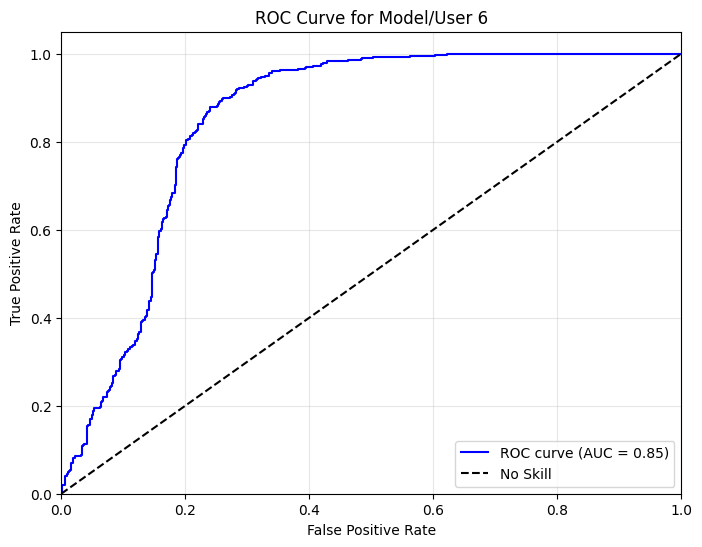

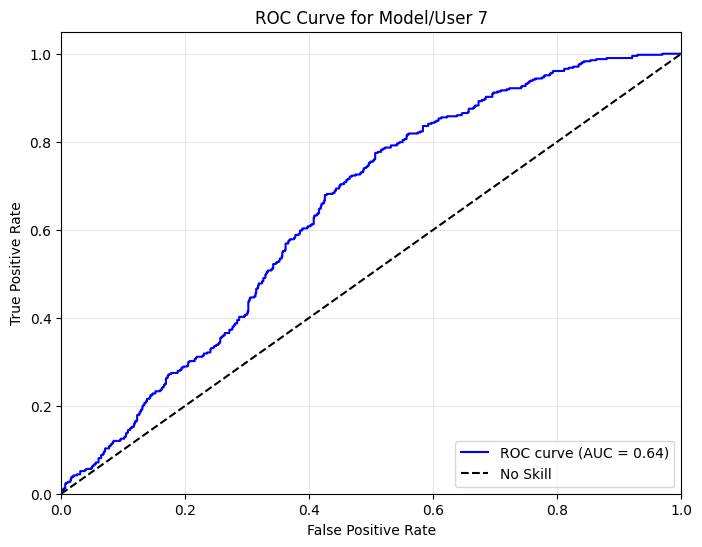

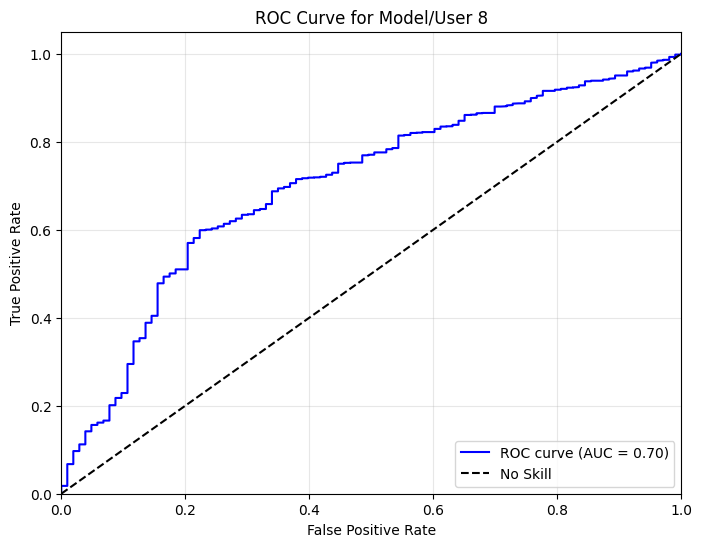

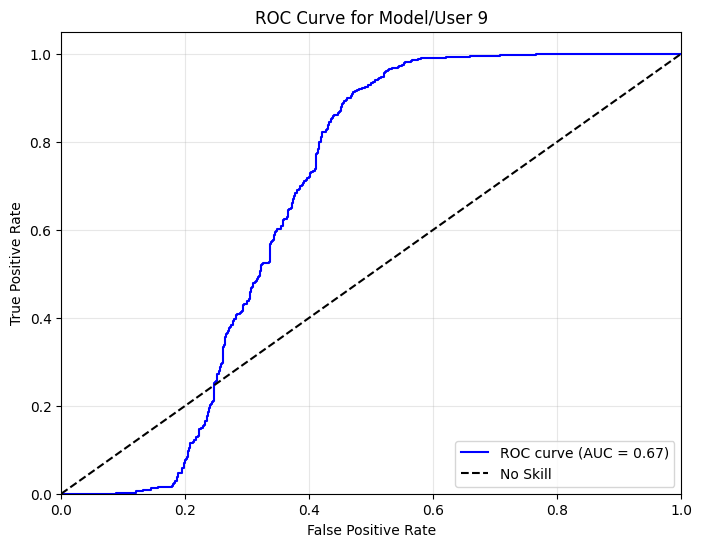

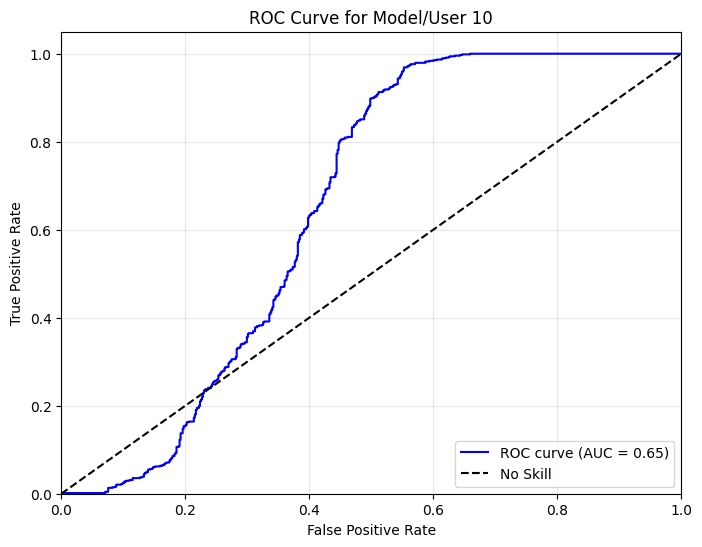

In [ ]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

for i in range(len(prediction)):
    # Ensure prediction[i] contains probabilities for the positive class
    fpr, tpr, thresholds = roc_curve(y_labels[i], anomaly_scores[i])
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Model/User {i+1}')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    plt.show()

In [ ]:
# IT SEEMS TAHT USER5->user21  have skwed dataset lets investigate
user_sessions['user23'].describe()


,record timestamp,client timestamp,x,y
count,122905.000000,122905.000000,122905.000000,122905.000000
mean,5691.878717,5691.467314,342.882088,322.311696
std,3791.438509,3790.852737,264.820445,175.666521
min,0.000000,0.000000,0.000000,0.000000
25%,2516.229000,2516.233000,177.000000,185.000000
50%,5341.606000,5341.630000,269.000000,316.000000
75%,8626.425000,8624.000000,415.000000,452.000000
max,20934.878000,20930.327000,1279.000000,799.000000


In [ ]:
user_sessions['user21'].describe()

,record timestamp,client timestamp,x,y
count,123526.000000,123526.000000,123526.000000,123526.000000
mean,3419.018544,3418.791066,349.861835,330.700468
std,2511.225303,2510.677063,236.035644,182.594065
min,0.000000,0.000000,0.000000,0.000000
25%,1773.735500,1773.742750,185.000000,198.000000
50%,2875.651500,2875.683500,290.000000,307.000000
75%,4553.908250,4553.454500,471.000000,464.000000
max,15193.337000,15193.437000,1363.000000,767.000000


In [ ]:
df_con=pd.concat(user_sessions)
all_users_stats = df_con.describe()  # Summary stats for all users
user5_stats = user_sessions['user21'].describe()  # Summary stats for User 5

# Compare statistics
print("All Users Statistics:\n", all_users_stats)
print("User 5 Statistics:\n", user5_stats)


All Users Statistics:
        record timestamp  client timestamp             x             y
count      2.158238e+06      2.158238e+06  2.158238e+06  2.158238e+06
mean       4.676484e+03      4.676371e+03  4.448631e+02  3.964311e+02
std        4.376698e+03      4.376680e+03  3.249661e+02  2.169465e+02
min        0.000000e+00      0.000000e+00  0.000000e+00  0.000000e+00
25%        1.492074e+03      1.492009e+03  2.240000e+02  2.380000e+02
50%        3.079750e+03      3.079374e+03  3.420000e+02  3.800000e+02
75%        6.737952e+03      6.737933e+03  6.000000e+02  5.280000e+02
max        2.594902e+04      2.594914e+04  1.919000e+03  1.079000e+03
User 5 Statistics:
        record timestamp  client timestamp              x              y
count     123526.000000     123526.000000  123526.000000  123526.000000
mean        3419.018544       3418.791066     349.861835     330.700468
std         2511.225303       2510.677063     236.035644     182.594065
min            0.000000          0.0000

In [ ]:
len(df_con['button'].unique())

4

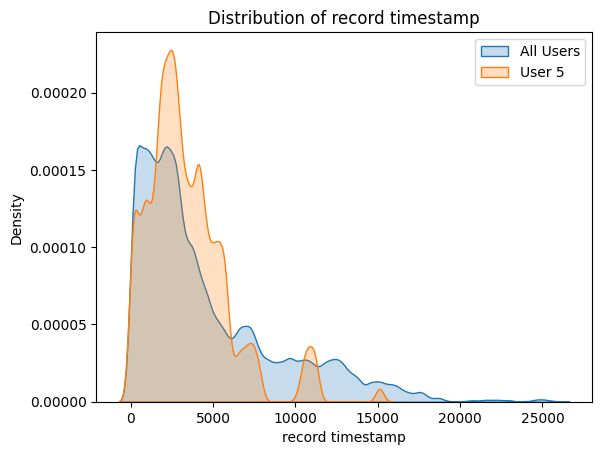

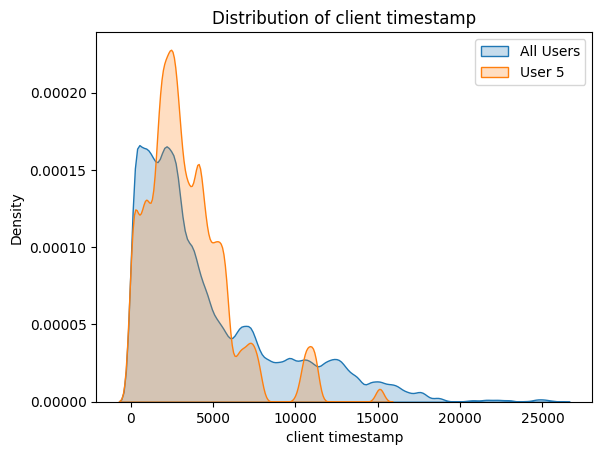

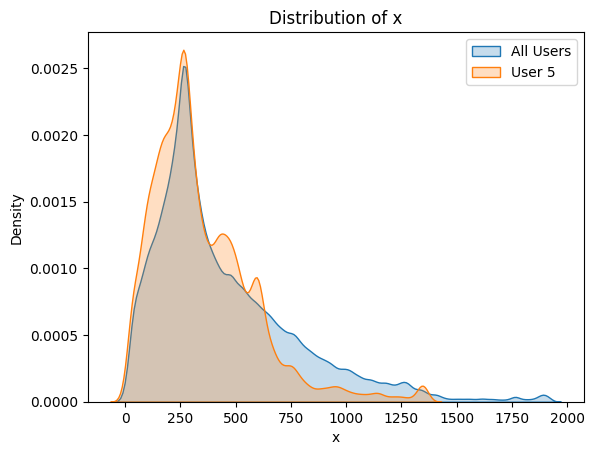

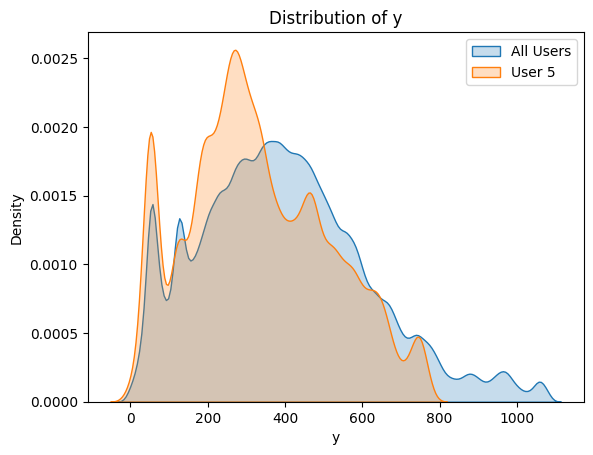

In [ ]:
import seaborn as sns

for feature in df_con.columns:
    # KDE plot for all users

  if len(df_con[feature].unique()) <6:
    continue
# KDE plot for a single feature
  sns.kdeplot(df_con[feature], label='All Users', fill=True)
  sns.kdeplot(user_sessions['user21'][feature], label='User 5', fill=True)
  plt.title(f'Distribution of {feature}')
  plt.legend()
  plt.show()

In [ ]:

print(len(prediction))
#len(user_sessions_t['user12']['filename'].unique)
print(len(new_user_data))
print('lol')
number_of_anomalies=np.count_nonzero(prediction==-1)
print('HERE IS PERCENTAGE OF ANOMALIES TO ALL DATAS: ',(number_of_anomalies/len(prediction)*100))